- Avl:


,insertion,search,deletion
0,0.001162,0.000320,0.228594
1,0.000591,0.000131,0.201653
2,0.000151,0.000100,0.207414
3,0.000250,0.000120,0.222031
4,0.000181,0.000121,0.191664


- Red-Black:


,insertion,search,deletion
0,0.001403,0.000161,0.001082
1,0.000100,0.000190,0.000161
2,0.000101,0.000081,0.000160
3,0.000130,0.000110,0.000191
4,0.000090,0.000140,0.000210


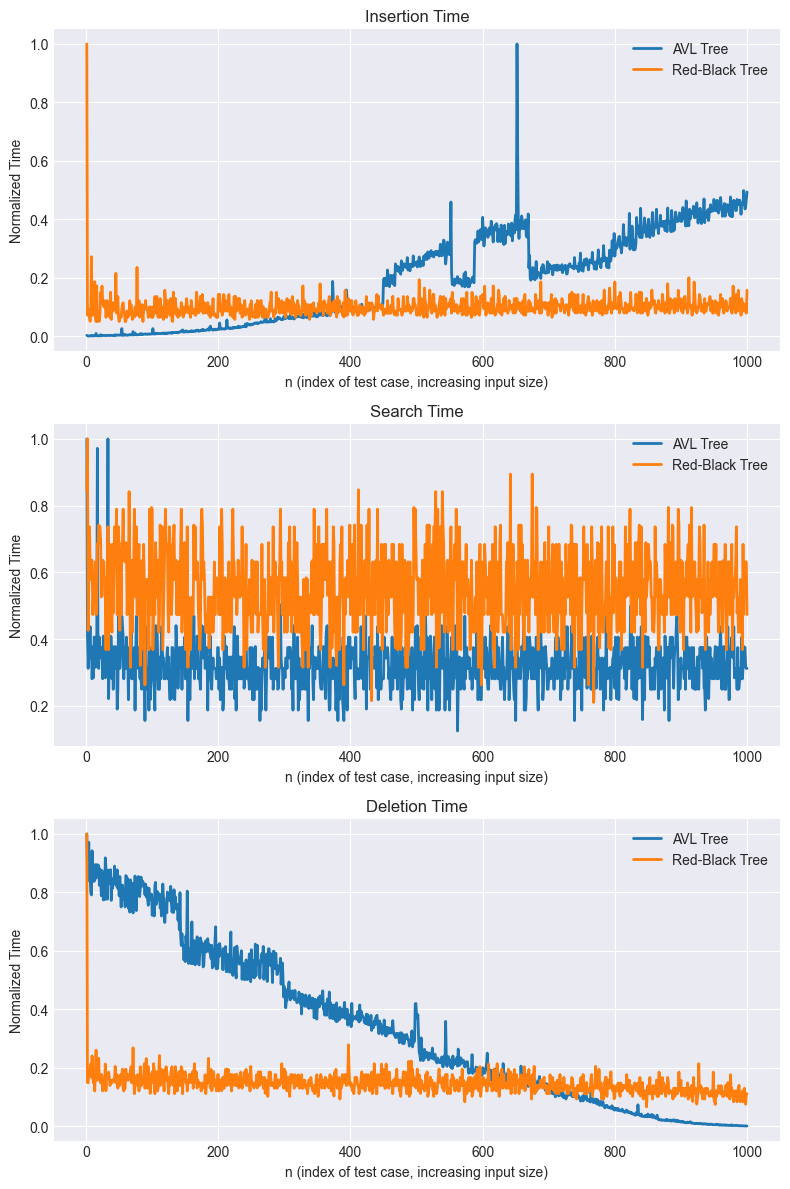

In [12]:
# --- Import required libraries ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Read CSV files ---
# Each file has 3 columns: insertion, search, deletion
# Each row corresponds to a different n value (growing size)
avl_df = pd.read_csv('exec_time_avl.csv', header=None, names=['insertion', 'search', 'deletion'])
rbt_df = pd.read_csv('exec_time_rbt.csv', header=None, names=['insertion', 'search', 'deletion'])

# --- Check structure---
print("- Avl:")
display(avl_df.head())
print("- Red-Black:")
display(rbt_df.head())

# --- Generate x-axis as the number of elements ---
n_values = range(1, len(avl_df) + 1)

# --- Setup plots ---
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
algorithms = ['insertion', 'search', 'deletion']
titles = ['Insertion Time', 'Search Time', 'Deletion Time']

# --- Plot each algorithm ---
for i, algo in enumerate(algorithms):
    # axes[i].plot(n_values, avl_df[algo], label='AVL Tree')
    # axes[i].plot(n_values, rbt_df[algo],  label='Red-Black Tree')
    avl_norm = avl_df[algo] / avl_df[algo].max()
    rbt_norm = rbt_df[algo] / rbt_df[algo].max()

    axes[i].plot(n_values, avl_norm, label='AVL Tree', linewidth=2)
    axes[i].plot(n_values, rbt_norm, label='Red-Black Tree', linewidth=2)
    axes[i].set_ylabel('Normalized Time')
    
    axes[i].set_xlabel('n (index of test case, increasing input size)')
    # axes[i].set_ylabel('Execution Time (ms)')
    axes[i].set_title(titles[i])
    
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
